In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (9, 6)
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# s_s = pd.read_csv('sample_submission.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train['SaleType'].value_counts(dropna = False).head(10)

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

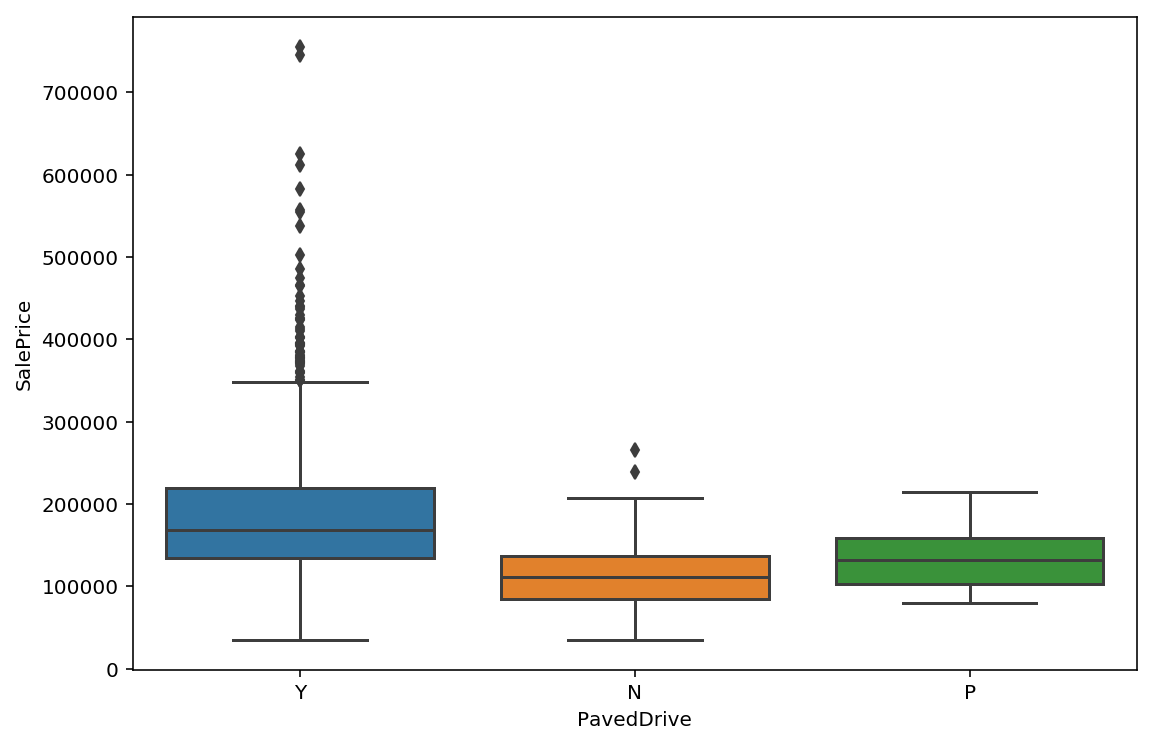

In [5]:
sns.boxplot(x="PavedDrive", y="SalePrice", 
            data=train)

In [6]:
train.SalePrice.min(), train.SalePrice.max()

(34900, 755000)

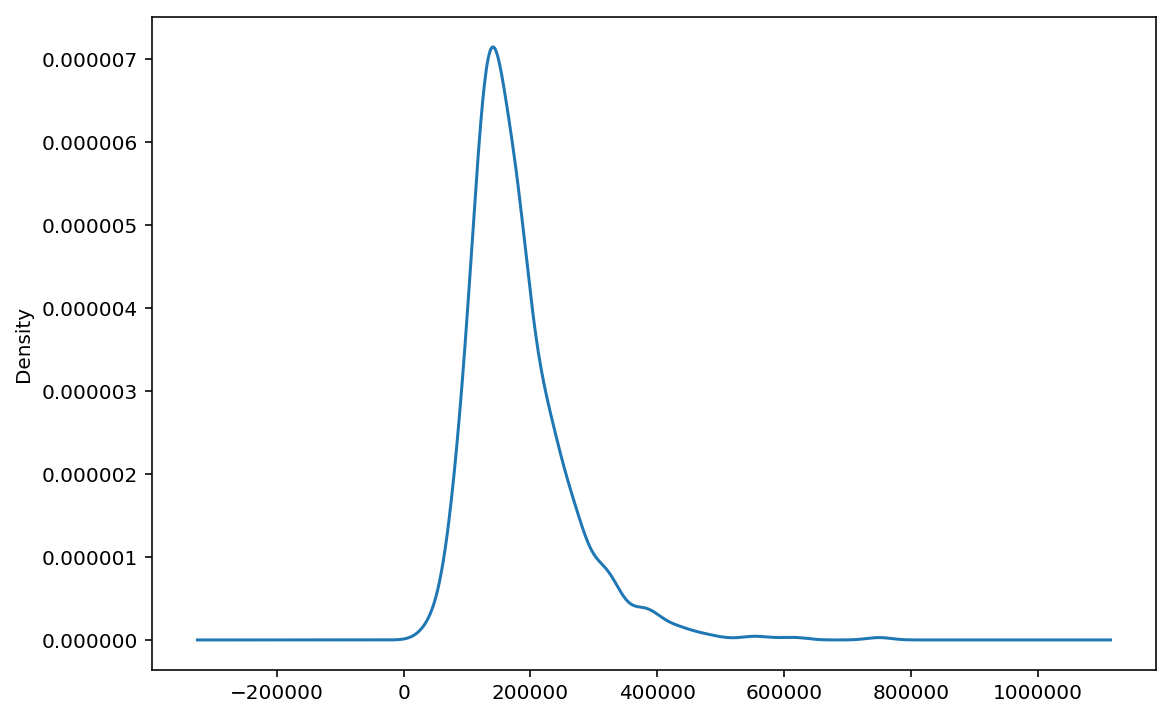

In [7]:
train['SalePrice'].plot.density()

In [8]:
train.SalePrice.mean()

180921.19589041095

In [9]:
price = train.pivot_table(
            index='OverallCond',
            columns='HouseStyle',
            values='SalePrice').fillna(0).applymap(float)
price

HouseStyle,1.5Fin,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl
OverallCond,,,,,,,,
1,0.000000,0.000000,61000.000000,0.0,0.000000,0.000000,0.000000,0.000000
2,85000.000000,0.000000,179310.666667,0.0,0.000000,87000.000000,0.000000,0.000000
3,101375.000000,76000.000000,99719.705882,197000.0,0.000000,87250.000000,0.000000,0.000000
4,125785.111111,0.000000,115903.846154,0.0,122000.000000,127377.777778,94479.500000,130000.000000
5,147922.777778,96500.000000,199324.703963,118500.0,133166.666667,223833.504950,144999.833333,163401.666667
6,132093.939394,108171.428571,148710.536585,104000.0,155100.000000,185053.750000,133642.857143,154558.823529
7,150313.714286,120100.000000,145290.648936,195500.0,132000.000000,192501.414634,123571.428571,196643.846154
8,144732.352941,132000.000000,151563.392857,179500.0,0.000000,174825.000000,109950.000000,158266.666667
9,275800.000000,0.000000,151000.000000,385000.0,325000.000000,194588.888889,178400.000000,145000.000000


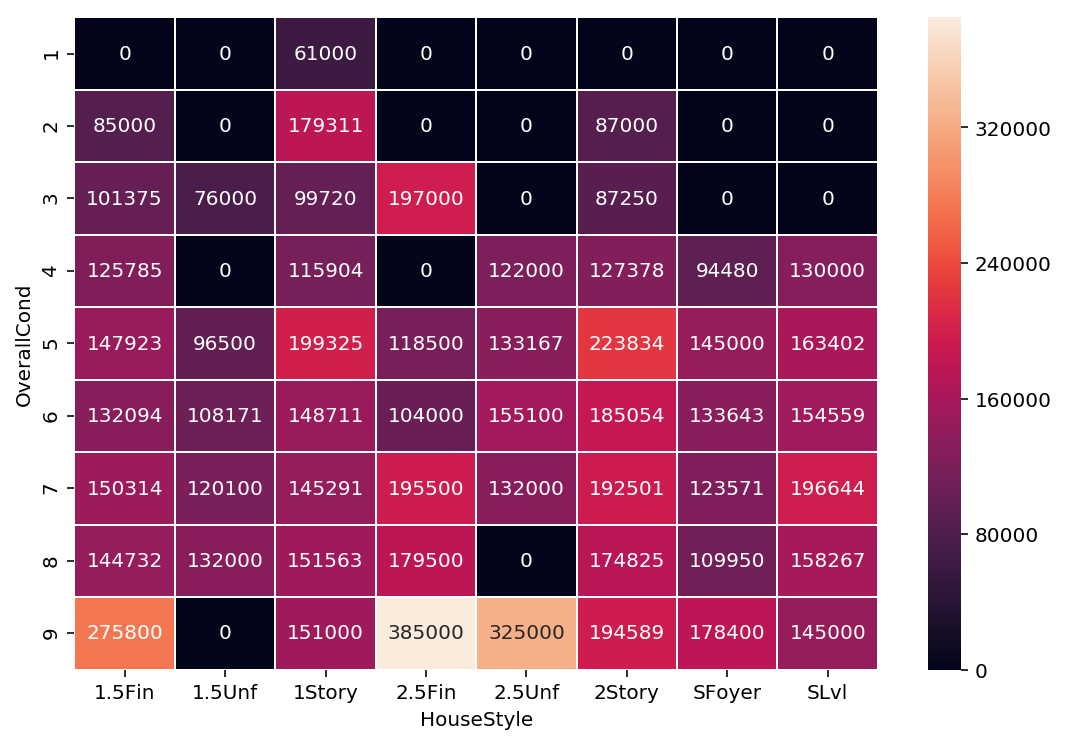

In [10]:
sns.heatmap(price, annot=True, fmt=".0f", 
            linewidths=.5);

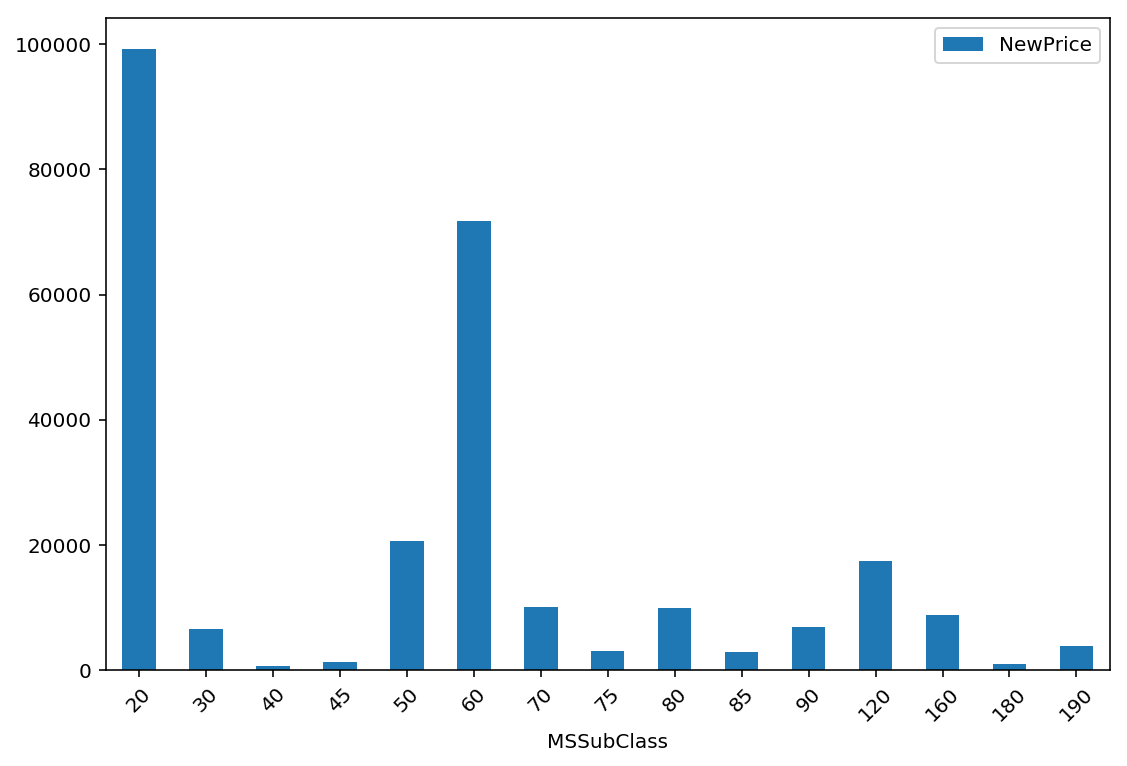

In [11]:
train['NewPrice'] = train.SalePrice*0.001
train[['NewPrice','MSSubClass']]\
    .groupby('MSSubClass').sum()\
    .plot(kind='bar', rot=45);

In [13]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

In [15]:
df = train[['ExterQual', 'BsmtQual', 'MSSubClass', 'SalePrice']]
df = df.replace(to_replace=['Gd', 'TA', 'Ex', 'Fa' ], value=[2, 1, 3, 0])
df.BsmtQual = df.BsmtQual.fillna(0)


In [20]:
init_notebook_mode(connected=True)

In [32]:
v_df = df.groupby('MSSubClass')[['ExterQual', 'BsmtQual']].mean()\
    .join(df.groupby('MSSubClass')[['SalePrice']].sum())
    
v_df.head()

,ExterQual,BsmtQual,SalePrice
MSSubClass,,,
20,1.393657,1.552239,99280499
30,1.000000,0.869565,6612251
40,1.500000,1.250000,624500
45,1.083333,0.916667,1303100
50,1.111111,1.041667,20635628


In [ ]:
trace0 = go.Scatter(
    x=genres_df.Critic_Score,
    y=genres_df.User_Score,
    mode = 'markers+text',
    text = genres_df.index,
    textposition='bottom'
)

In [33]:
trace0 = go.Scatter(
    x=v_df.ExterQual,
    y=v_df.BsmtQual,
    mode = 'markers+text',
    text = v_df.index,
    #textposition='bottom'
    marker = dict(
        size = 1/1000000*v_df.SalePrice,
        color = [
            'aqua', 'azure', 'beige', 'lightgreen',
            'lavender', 'lightblue', 'pink', 'salmon',
            'wheat', 'ivory', 'silver', 'plum'
        ]
    )
)

data = [trace0]
layout = {'title': 'Statistics of house sales'}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)